# Принятие решений в бизнесе

**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Задача**
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста** 

Вы провели A/B-тест и получили результаты, которые описаны в файлах

/datasets/orders.csv:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

/datasets/visitors.csv:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Задача**

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
* Остановить тест, зафиксировать победу одной из групп.
* Остановить тест, зафиксировать отсутствие различий между группами.
* Продолжить тест.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import math
import scipy.stats as stats
from scipy import stats as st
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

## Приоритизация гипотез

In [4]:
hypothesis.info()
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведем наименования столбцов к snake_case

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

Для приоритизации гипотез мы будем использовать фреймворки **ICE** (влияние, уверенность, усилия) и **RICE** (влияние, уверенность, усилия, охват)

In [6]:
# ICE score = (Impact x Confidence) / Efforts
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

# RICE score = (Reach x Impact x Confidence) / Efforts 
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

### Фреймворк ICE для приоритизации гипотез: сортировка по убыванию

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


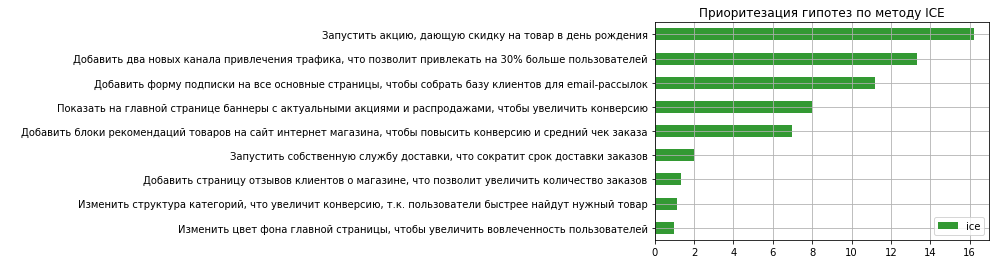

In [7]:
display(hypothesis[['hypothesis', 'ice']].sort_values(by = 'ice', ascending=False))

# визуализируем
ax = (hypothesis[['hypothesis', 'ice']]
      .set_index('hypothesis')
      .sort_values('ice', ascending=True)
      .plot(kind='barh', color='g', alpha=0.8)
     )
ax.grid(True)
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу ICE')
plt.show()

### Фреймворк RICE для приоритизации гипотез: сортировка по убыванию

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


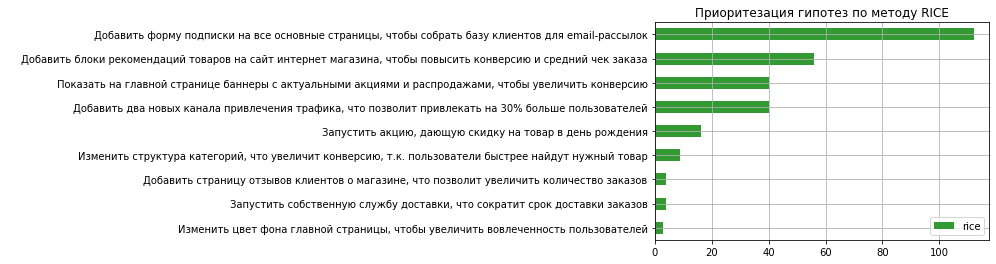

In [8]:
display(hypothesis[['hypothesis', 'rice']].sort_values(by = 'rice', ascending=False))

# визуализируем
ax = (hypothesis[['hypothesis', 'rice']]
      .set_index('hypothesis')
      .sort_values('rice', ascending=True)
      .plot(kind='barh', color='g', alpha=0.8)
     )
ax.grid(True)
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу RICE')
plt.show()

### Как изменилась приоритизация гипотез при применении RICE вместо ICE

**Наиболее перспективные гипотезы по ICE:**
* 8 - Запустить акцию, дающую скидку на товар в день рождения
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

**Наиболее перспективные гипотезы по RICE:**
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

**Вывод**

Приоритет гипотез изменился после добавления в формулу расчёта показателя Reach (охват пользователей). Поэтому целесообразнее при определении приоритета гипотезы учитывать не только влияние на пользователей, затраты и степень уверенности в самой гипотезе, но и число пользователей, которых она затронет. Гипотеза 7 получается наиболее перспективна, т.к. помимо высоких impact и confidence, коснётся всех пользователей сайта.

## Анализ A/B-теста

**orders и visitors: предобработка данных**

In [9]:
for i in [orders, visitors]:
    display(i.head())
    display(i.info())
    display(i.isna().sum())
    print('Дубликаты:', i.duplicated().sum())
    print()
    for column in i.columns:
        print(column)
        print(i[column].unique())
        print()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Дубликаты: 0

transactionId
[3667963787 2804400009 2961555356 ... 1807773912 1947021204 3936777065]

visitorId
[3312258926 3642806036 4069496402 ...  370388673  573423106 2108080724]

date
['2019-08-15' '2019-08-16' '2019-08-01' '2019-08-22' '2019-08-17'
 '2019-08-23' '2019-08-02' '2019-08-18' '2019-08-24' '2019-08-03'
 '2019-08-25' '2019-08-28' '2019-08-19' '2019-08-06' '2019-08-26'
 '2019-08-29' '2019-08-04' '2019-08-20' '2019-08-09' '2019-08-07'
 '2019-08-30' '2019-08-05' '2019-08-27' '2019-08-21' '2019-08-08'
 '2019-08-10' '2019-08-31' '2019-08-11' '2019-08-12' '2019-08-13'
 '2019-08-14']

revenue
[   1650     730     400    9759    2308    2210    1860    1044   13710
    1855    4008    4499    7370   11985   10980   15277    1060     990
   16490    1190     300    1050     632   15185    7555    3488    7620
    5280     700     190     383    1680   22785    2355    2470    6250
   19260     610    2986    1090    9290    2480    3000    2140    3590
    6990    1250    2970  

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

date        0
group       0
visitors    0
dtype: int64

Дубликаты: 0

date
['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']

group
['A' 'B']

visitors
[719 619 507 717 756 667 644 610 617 406 718 595 748 735 628 361 412 668
 502 575 646 609 468 395 621 722 711 594 577 490 699 713 581 509 770 707
 655 709 654 369 721 543 769 746 544 413 421 737 487 560 656 650 546 378
 679 676 720 531]



Пропусков и дубликатов нет, необходима легкая "косметика"

In [10]:
# преобразование типа данных в date
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# переименование в стиле snake_case
orders.columns = [x.replace('Id', '_id') for x in orders.columns.values]

Перед началом анализа результа A/B-теста проверим пользователей на одновременное нахождение в обеих группах

In [11]:
doubles = orders.groupby(['visitor_id']).agg({'group' : 'nunique', 'transaction_id' : 'count', 'revenue' : 'sum'}).reset_index()
print(f'Пользователей, попавших в обе группы: {doubles[doubles.group != 1]["visitor_id"].count()}')
print(f"Сумма заказов этих пользователей    : {doubles[doubles.group != 1]['revenue'].sum()}")
print(f"Количество их заказов               : {doubles[doubles.group != 1]['transaction_id'].sum()}")

Пользователей, попавших в обе группы: 58
Сумма заказов этих пользователей    : 1558935
Количество их заказов               : 181


Итого: **58** пользователей находятся сразу **в двух группах** тестирования, они совершили 181 заказ на общую сумму более 1,5 млн

In [12]:
display(round(doubles[doubles.group != 1]["visitor_id"].count() / orders['visitor_id'].count() * 100, 2))

4.85

Это **менее 5%** от общего количества пользователей - можем их далее не учитывать, **дропаем**

In [13]:
drop_list = list(doubles[doubles.group != 1]['visitor_id'])
orders = orders.query('visitor_id not in @drop_list')

### График кумулятивной выручки по группам

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


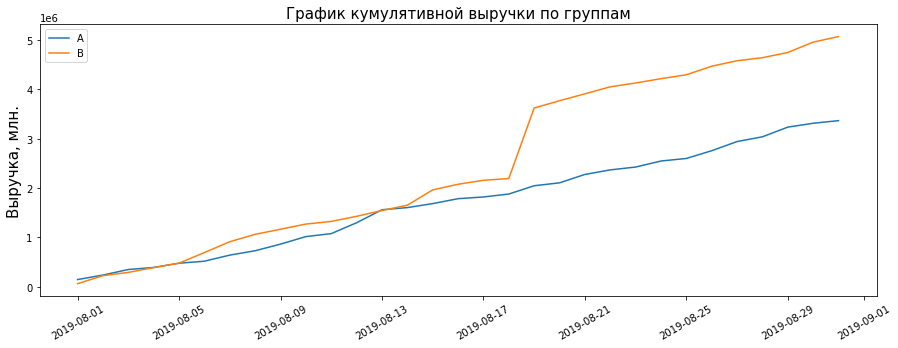

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам', fontsize=15)
plt.ylabel("Выручка, млн.", fontsize=15)
plt.xticks(rotation=30)
plt.legend()
plt.show()

Из графика видно, что А/В-тест длился весь август 2019г.

В первой половине месяца выручка по группам росла примерно равными темпами, и группа В показывала незначительно лучшие результаты. После 17 августа в группе В наблюдается резкий скачок вверх, эта группа существенно оторвалась от А и далее до конца теста темпы прироста выручки практически одинаковы. Возможно, аномальные (крупные) заказы: принимать решение рано, требуется анализ выбросов.

### График кумулятивного среднего чека по группам

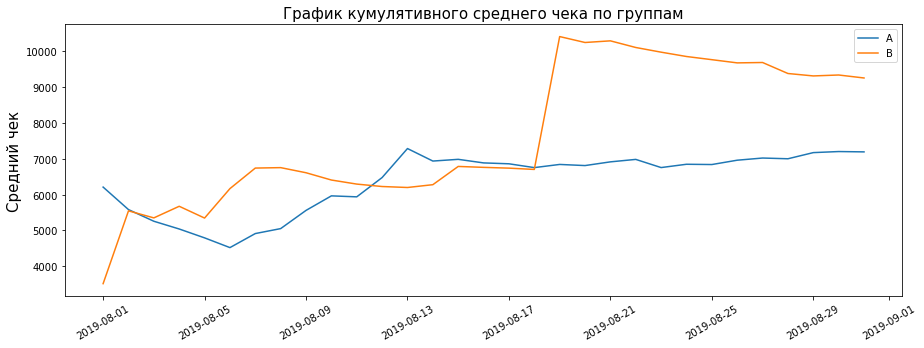

In [16]:
plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам', fontsize=15)
plt.ylabel('Средний чек', fontsize=15)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

Средний чек до 17го августа скачет и далее стабилизируется. Видим тот же гигантский скачок в группе В: аномально крупные заказы

### График относительного изменения кумулятивного среднего чека группы B к группе A

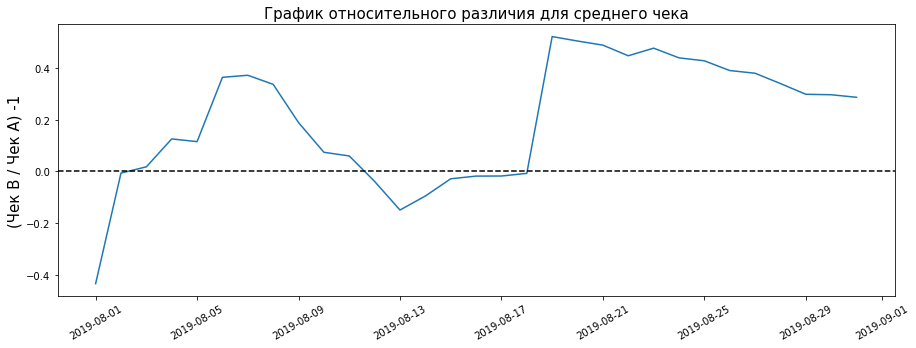

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного различия для среднего чека', fontsize=15)
plt.ylabel('(Чек В / Чек А) -1', fontsize=15)
plt.xticks(rotation=30)
plt.show()

Ярко выражены два пика, когда средний чек группы B значительно превосходил показатель группы А, и далее быстро шел на снижение

### График кумулятивного среднего количества заказов на посетителя по группам

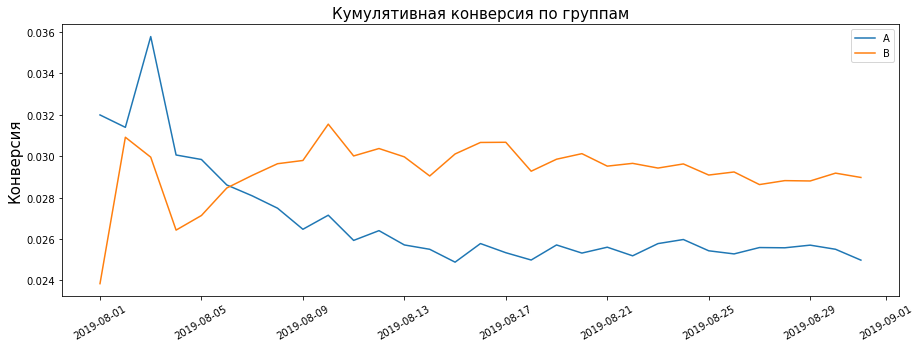

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Кумулятивная конверсия по группам', fontsize=15)
plt.ylabel('Конверсия', fontsize=15)
plt.xticks(rotation=30)
plt.legend()
plt.show()

# задаем масштаб осей
# plt.axis(["2019-08-01", '2019-09-01', 0, 0.015]) 

После 6го августа видим переломный момент: сперва лучше конверсия группы А, но позже резкий скачек выводит на лучшие показатели группу В

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

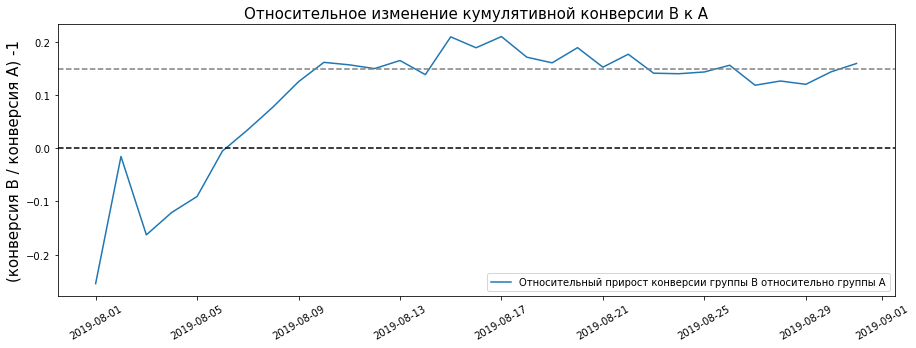

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.title('Относительное изменение кумулятивной конверсии В к А', fontsize=15)
plt.ylabel('(конверсия В / конверсия А) -1', fontsize=15)
plt.xticks(rotation=30)
plt.legend()
plt.show()

# plt.axis(["2019-08-01", '2019-09-01', -0.6, 0.6])

Конверсия группы В вскоре после начала теста опередила конверсию А и до конца теста оставалась выше. На графике видны скачки, что может говорить о наличии выбросов в данных

### Точечный график количества заказов по пользователям

count   973.000
mean      1.044
std       0.238
min       1.000
25%       1.000
50%       1.000
75%       1.000
max       3.000
Name: orders, dtype: float64

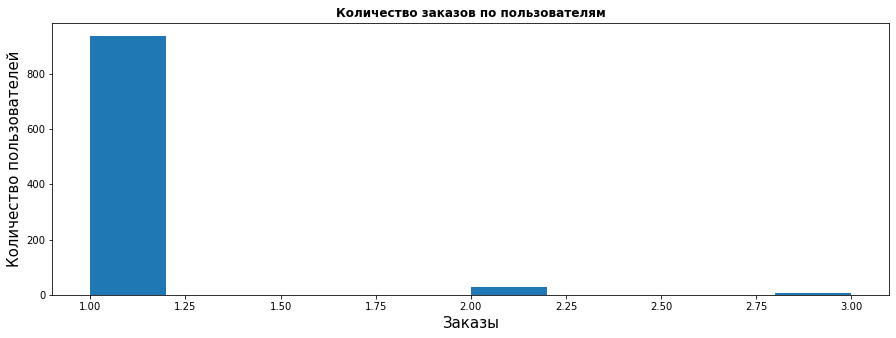

In [20]:
# Датафрейм с количеством заказов по пользователям:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']

display(ordersByUsers['orders'].describe())

plt.figure(figsize=(15,5))

plt.hist(ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.xlabel('Заказы', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=15)
plt.show()

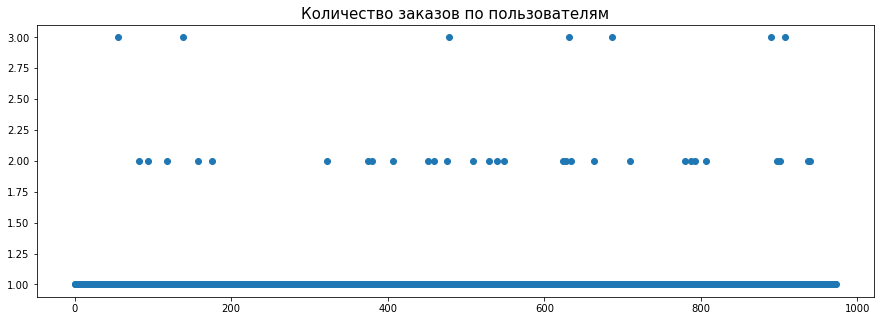

In [21]:
# Построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.title('Количество заказов по пользователям', fontsize=15)
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

Большинство пользователей совершали 1 заказ (непрерывная линия показывает это), оставшиеся значения 2 и 3 больше похожи на выбросы

### 95-й и 99-й перцентили количества заказов на пользователя, граница для определения аномальных пользователей

In [22]:
display(np.percentile(ordersByUsers['orders'], [95,99]))

array([1., 2.])

5% пользователей сделали больше 1 заказов, и 1% пользователей сделали больше 2х. Разумно выбрать 1 заказа на одного пользователя за нижнюю границу числа заказов, и убрать аномальных пользователей по ней.

### Точечный график стоимостей заказов

count       1,016.000
mean        8,300.815
std        42,121.992
min            50.000
25%         1,190.000
50%         2,955.000
75%         8,134.250
max     1,294,500.000
Name: revenue, dtype: float64

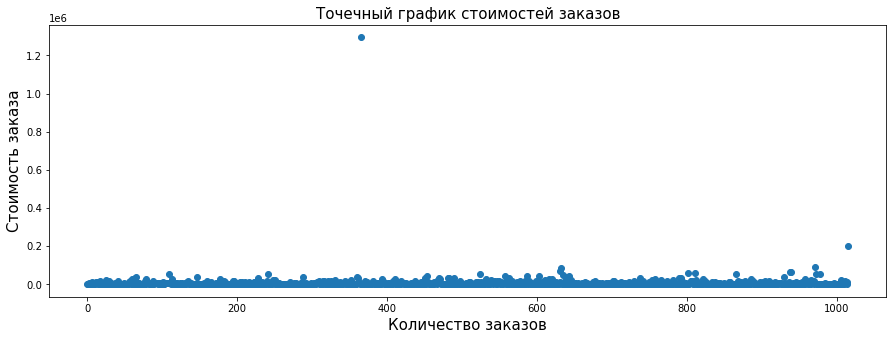

In [23]:
display(orders['revenue'].describe())

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,5))

plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов', fontsize=15)
plt.xlabel('Количество заказов', fontsize=15)
plt.ylabel('Стоимость заказа', fontsize=15)
plt.show()

Видим выброс - заказ стоимость 1,3 млн. Также немного выбивается заказ стоимость 200 тысяч, в среднем, даже большие заказы не превышают 100 тысяч

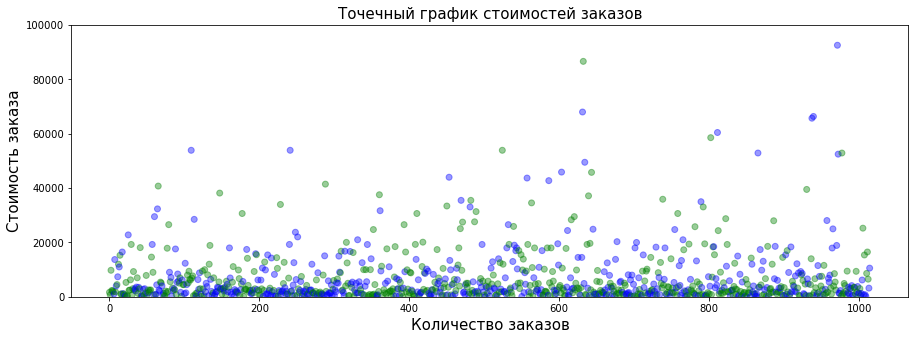

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,5))

plt.title('Точечный график стоимостей заказов', fontsize=15)
plt.xlabel('Количество заказов', fontsize=15)
plt.ylabel('Стоимость заказа', fontsize=15)

# детализируем заказы до 100 000
plt.ylim([0,100000])
plt.scatter(x_values, orders['revenue'], c=orders['group'].map({'A': 'blue', 'B': 'green'}), alpha=0.4);

Заказы укладываются в отметку до 20 000

### 95-й и 99-й перцентили стоимости заказов, граница для определения аномальных заказов

In [25]:
display(np.percentile(orders['revenue'], [95,99]))

array([26785., 53904.])

Лишь 5% пользователей совершают покупку на сумму больше 26 785, и лишь 1% - на сумму больше 53 904.

Все заказы, дороже 27 000 - считаем аномалией

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [26]:
# Подготовим датафрейм с фактическими и кумулятивными данными по дням

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = (ordersADaily
                      .apply(lambda x:ordersADaily[ordersADaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateA':'sum',
                                    'revenuePerDateA':'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = (ordersBDaily
                      .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateB':'sum',
                                    'revenuePerDateB' : 'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
       )

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [27]:
# Создадим для каждой группы датафрейм с количеством заказов на пользователя

ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id':pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id':pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

# Создадим списки с числом заказов каждого пользователя, включая нули:

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Определим гипотезы:

**H₀** - статистически значимых различий в конверсии между группами нет

**H₁** - статистически значимые различия в конверсии между группами есть

**alpha = 0.05**

In [28]:
# Применим статистический критерий Манна-Уитни

print("p-value                  = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value                  = 0.011
Относительный показатель = 0.160


p-value (0.011) меньше 0.05: отвергаем нулевую гипотезу об отсутствии значимых различий в конверсии между группами.

По «сырым» данным различия в конверсии групп A и B есть, относительное преимущество группы B над A равно 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**H₀** - статистически значимых различий в среднем чеке между группами нет

**H₁** - статистически значимые различия в среднем чеке между группами есть

In [29]:
print("p-value                  = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], alternative="two-sided"))
print("Относительный показатель = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value                  = 0.829
Относительный показатель = 0.287


p-value больше alpha: не можем отвергнуть нулевую гипотезу об отсутствии значимых различий в среднем чеке между группами.

По «сырым» данным чеки групп A и B схожи, относительное преимущество группы B над A равно 28,7%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Выделим из базы аномальных пользователей: совершивших более 1-го заказа или сумма заказа которых превышает 27 000

In [30]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], [95, 99])[0]+1)]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], [95, 99])[0]+1)]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Количество аномальных пользователей:', abnormalUsers.shape[0])

Количество аномальных пользователей: 58


In [31]:
# Создадим списки с числом заказов каждого пользователя по очищенным данным:

sampleAFiltered = pd.concat([ordersByUsersA[~(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[~(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

**H₀** - статистически значимых различий в конверсии между группами нет

**H₁** - статистически значимые различия в конверсии между группами есть

In [32]:
print("p-value                  = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель = {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value                  = 0.012
Относительный показатель = 0.182


p-value меньше alpha: отвергаем нулевую гипотезу об отсутствии значимых различий в конверсии между группами.

По «чистым» данным различия в конверсии групп A и B есть, относительное преимущество группы B над A равно 18,2%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**H₀** - статистически значимых различий в средних чеках между группами нет

**H₁** - статистически значимые различия в средних чеках между группами есть

In [33]:
print("p-value                  = {0:.3f}".format(stats.mannwhitneyu(orders[(orders['group']=='A') & ~(orders['visitor_id'].isin(abnormalUsers))]['revenue'], orders[(orders['group']=='B') & ~(orders['visitor_id'].isin(abnormalUsers))]['revenue'])[1], alternative="two-sided"))
print("Относительный показатель = {0:.3f}".format(orders[(orders['group']=='B') & ~(orders['visitor_id'].isin(abnormalUsers))]['revenue'].mean()/orders[(orders['group']=='A') & ~(orders['visitor_id'].isin(abnormalUsers))]['revenue'].mean()-1))

p-value                  = 0.646
Относительный показатель = -0.048


p-value больше alpha: не можем отвергнуть нулевую гипотезу об отсутствии значимых различий в среднем чеке между группами.

По «чистым» данным чеки групп A и B схожи, относительное преимущество группы А над В равно 48%.

### Решение по результатам теста

**По сырым данным**

Среднее количество заказов на посетителя между группами
* различия - есть
* преимущество группы В над А - 16%

Средний чек заказа между группами
* различия - нет
* преимущество группы В над А - 28.7%

**По очищенным данным**

Среднее количество заказов на посетителя между группами
* различия - есть
* преимущество группы В над А - 18.2

Средний чек заказа между группами
* различия - нет
* преимущество группы А над В - 48%

**Решение по А/В тесту**

Остановить тестирование: признать группу В победителем.